In [3]:
from google.colab import files
uploaded = files.upload()

Saving trinetra_bulk_documents (2).zip to trinetra_bulk_documents (2).zip


In [4]:
import zipfile
import os

zip_path = next(iter(uploaded))  # Get the uploaded file name
target_dir = "data/uploads"
os.makedirs(target_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

print(f"✅ Extracted all files to {target_dir}")

✅ Extracted all files to data/uploads


In [5]:
import glob

all_files = glob.glob(f"{target_dir}/**", recursive=True)
for file in all_files:
    print(file)


data/uploads/
data/uploads/legal_terms_2.pdf
data/uploads/it_guidelines.pdf
data/uploads/upskilling_policy.docx
data/uploads/benefits_sheet_1.xlsx
data/uploads/legal_terms_5.pdf
data/uploads/admin_guidelines_2.docx
data/uploads/termination_procedure.docx
data/uploads/admin_guidelines_5.docx
data/uploads/hr_policy_5.pdf
data/uploads/benefits_sheet_4.xlsx
data/uploads/legal_terms_3.pdf
data/uploads/admin_guidelines_3.docx
data/uploads/onboarding_policy.docx
data/uploads/benefits_sheet_3.xlsx
data/uploads/benefits_sheet_2.xlsx
data/uploads/upskilling_policy.pdf
data/uploads/it_team_guidelines.pdf
data/uploads/hr_policy_1.pdf
data/uploads/benefits_sheet_5.xlsx
data/uploads/legal_terms_4.pdf
data/uploads/admin_guidelines_1.docx
data/uploads/termination_policy.pdf
data/uploads/onboarding_process.docx
data/uploads/legal_terms_1.pdf
data/uploads/admin_guidelines_4.docx
data/uploads/hr_policy_2.pdf
data/uploads/hr_policy_3.pdf
data/uploads/hr_policy_4.pdf


In [2]:
!pip install sentence-transformers chromadb PyPDF2 python-docx openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 13.2 MB/s 

In [6]:
import os
import chromadb
from PyPDF2 import PdfReader
from docx import Document
import openpyxl
from sentence_transformers import SentenceTransformer

print("✅ All libraries loaded successfully.")


✅ All libraries loaded successfully.


In [7]:
import chromadb

chroma_client = chromadb.PersistentClient(path="./chroma_db")
collection = chroma_client.get_or_create_collection("policy_docs")
print("✅ ChromaDB client initialized and collection created.")

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


✅ ChromaDB client initialized and collection created.


In [8]:
os.makedirs("data/uploads", exist_ok=True)
os.makedirs("data/text", exist_ok=True)
os.makedirs("chroma_db", exist_ok=True)


In [9]:
import os
from PyPDF2 import PdfReader
from docx import Document
import openpyxl

UPLOAD_DIR = "data/uploads"
TEXT_DIR = "data/text"
os.makedirs(TEXT_DIR, exist_ok=True)

def parse_pdf(file_path):
    try:
        reader = PdfReader(file_path)
        return "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    except Exception as e:
        return f"[PDF PARSE ERROR] {e}"

def parse_docx(file_path):
    try:
        doc = Document(file_path)
        return "\n".join([p.text for p in doc.paragraphs if p.text.strip()])
    except Exception as e:
        return f"[DOCX PARSE ERROR] {e}"

def parse_xlsx(file_path):
    try:
        wb = openpyxl.load_workbook(file_path)
        text = []
        for sheet in wb.worksheets:
            for row in sheet.iter_rows(values_only=True):
                row_text = " | ".join([str(cell).strip() if cell else "" for cell in row])
                if row_text.strip():
                    text.append(row_text)
        return "\n".join(text)
    except Exception as e:
        return f"[XLSX PARSE ERROR] {e}"

# Process each file
for filename in os.listdir(UPLOAD_DIR):
    path = os.path.join(UPLOAD_DIR, filename)
    output_path = os.path.join(TEXT_DIR, f"{filename}.txt")

    if filename.endswith(".pdf"):
        text = parse_pdf(path)
    elif filename.endswith(".docx"):
        text = parse_docx(path)
    elif filename.endswith(".xlsx"):
        text = parse_xlsx(path)
    else:
        text = "[UNSUPPORTED FILE TYPE]"

    with open(output_path, "w", encoding="utf-8") as f:
        f.write(text)

print("✅ All documents parsed and saved to /data/text/")


✅ All documents parsed and saved to /data/text/


In [10]:
sample_file = "data/text/hr_policy_1.pdf.txt"
with open(sample_file, 'r', encoding='utf-8') as f:
    print(f.read()[:1000])  # Show first 1000 characters


Leave Policy: Employees are entitled to various types of leaves including casual, sick, and earned leave.
Working Hours: The standard working hours are from 9:30 AM to 6:30 PM.
Dress Code: Business casual attire is expected on weekdays.
Remote Work Policy: Employees can work remotely up to 3 days a week upon approval.


In [11]:
import os
import re

TEXT_DIR = "data/text"

def clean_text(raw_text):
    text = raw_text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Optional: preview before chunking
sample_file = "data/text/hr_policy_1.pdf.txt"
with open(sample_file, 'r', encoding='utf-8') as f:
    raw = f.read()
cleaned = clean_text(raw)
print(cleaned[:500])


Leave Policy: Employees are entitled to various types of leaves including casual, sick, and earned leave. Working Hours: The standard working hours are from 9:30 AM to 6:30 PM. Dress Code: Business casual attire is expected on weekdays. Remote Work Policy: Employees can work remotely up to 3 days a week upon approval.


In [12]:
def heading_chunker(text):
    # Assumes headers are in ALL CAPS or start with numbered bullets
    chunks = re.split(r'(?<=\n)([A-Z\s]{5,}|[0-9]+\.\s.*?)\n', text)
    merged = []
    i = 0
    while i < len(chunks) - 1:
        header = chunks[i].strip()
        body = chunks[i + 1].strip()
        merged.append(f"{header}\n{body}")
        i += 2
    return merged if merged else [text]


In [13]:
chunk_records = []

for filename in os.listdir(TEXT_DIR):
    with open(os.path.join(TEXT_DIR, filename), 'r', encoding='utf-8') as f:
        raw_text = f.read()

    clean = clean_text(raw_text)
    # Use heading_chunker for all file types
    chunks = heading_chunker(clean)

    for idx, chunk in enumerate(chunks):
        record = {
            "chunk_id": f"{filename}_chunk{idx}",
            "filename": filename,
            "file_type": filename.split(".")[0].split("_")[-1],
            "text": chunk
        }
        chunk_records.append(record)

print(f"✅ Prepared {len(chunk_records)} total text chunks")

✅ Prepared 28 total text chunks


In [14]:
import pandas as pd

df = pd.DataFrame(chunk_records)
df.to_csv("chunk_metadata.csv", index=False)
print("📁 Metadata CSV written: chunk_metadata.csv")


📁 Metadata CSV written: chunk_metadata.csv


In [15]:
import pandas as pd

df = pd.read_csv("chunk_metadata.csv")
print(f"✅ Loaded {len(df)} chunks")


✅ Loaded 28 chunks


In [16]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")
print("✅ MiniLM model loaded")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ MiniLM model loaded


In [17]:
texts = df['text'].tolist()
embeddings = embedder.encode(texts, show_progress_bar=True)
print("✅ Embeddings generated")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Embeddings generated


In [18]:
import chromadb
from chromadb.config import Settings

# Using the recommended way to instantiate PersistentClient
client = chromadb.PersistentClient(path="./chroma_db")

collection = client.get_or_create_collection("policy_docs")
print("✅ ChromaDB initialized and collection created")

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


✅ ChromaDB initialized and collection created


In [19]:
ids = df['chunk_id'].tolist()
metadatas = df[['filename', 'file_type']].to_dict(orient='records')

collection.add(
    ids=ids,
    embeddings=embeddings,
    documents=texts,
    metadatas=metadatas
)

print(f"✅ Stored {len(ids)} documents into ChromaDB")


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionAddEvent: capture() takes 1 positional argument but 3 were given


✅ Stored 28 documents into ChromaDB


In [20]:
query = "What is the upskilling policy for engineers?"
query_embedding = embedder.encode([query])[0]

results = collection.query(
    query_embeddings=[query_embedding],
    n_results=3
)

for i in range(3):
    print(f"🔹 Result {i+1}:")
    print("Text:", results['documents'][0][i][:500])
    print("Source:", results['metadatas'][0][i]['filename'])
    print("-" * 80)


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


🔹 Result 1:
Text: Trinetra.ai Labs - Upskilling Policy Employees can apply for sponsored courses up to INR25,000 per year. Requires manager approval and completion certificate.
Source: upskilling_policy.pdf.txt
--------------------------------------------------------------------------------
🔹 Result 2:
Text: Upskilling Policy Employees can claim reimbursement for approved online courses up to ₹20,000/year. Dedicated learning hours every Friday 3–5 PM. Internal hackathons and tech talks are conducted monthly. Certification bonus available for completing strategic skill certifications.
Source: upskilling_policy.docx.txt
--------------------------------------------------------------------------------
🔹 Result 3:
Text: Admin Guidelines Maintenance Request: Submit maintenance requests via the Helpdesk. IT Asset Policy: All laptops must be returned before exit formalities. Office Supplies: Stationery can be requested through the admin portal. Emergency Protocol: In case of fire or earthquake

In [21]:
query = "What is the termination policy for employees?"

In [22]:
query_embedding = embedder.encode([query])[0]

In [23]:
results = collection.query(
    query_embeddings=[query_embedding],
    n_results=3  # You can increase to 5–10 if needed
)

top_chunks = results['documents'][0]
top_metadatas = results['metadatas'][0]

print("✅ Retrieved top chunks for the query")

✅ Retrieved top chunks for the query


In [24]:
def build_prompt(query, contexts):
    context_block = "\n\n---\n\n".join(contexts)
    prompt = f"""You are a corporate policy assistant.

Use the following context to answer the question:

{context_block}

Question: {query}
Answer:"""
    return prompt

prompt = build_prompt(query, top_chunks)
print(prompt[:1000])  # Preview first 1000 characters


You are a corporate policy assistant.

Use the following context to answer the question:

Termination Clause: Termination may be initiated with 60 days notice. Data Protection: Sensitive data must be encrypted and stored securely. Conflict of Interest: Employees must declare any potential conflicts. NDA Clause: Employees are bound by a Non-Disclosure Agreement.

---

Termination Clause: Termination may be initiated with 60 days notice. Data Protection: Sensitive data must be encrypted and stored securely. Intellectual Property: All code and deliverables belong to Trinetra.ai Labs. Conflict of Interest: Employees must declare any potential conflicts.

---

NDA Clause: Employees are bound by a Non-Disclosure Agreement. Data Protection: Sensitive data must be encrypted and stored securely. Termination Clause: Termination may be initiated with 60 days notice. Intellectual Property: All code and deliverables belong to Trinetra.ai Labs.

Question: What is the termination policy for employees

In [25]:
!pip install transformers accelerate


In [26]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "microsoft/phi-2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

print("✅ Phi-2 model loaded")


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

✅ Phi-2 model loaded


In [27]:
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(
    **inputs,
    max_new_tokens=300,
    do_sample=True,
    temperature=0.7,
    top_p=0.9
)

response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("🤖 LLM Response:\n", response.split("Answer:")[-1].strip())


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🤖 LLM Response:
 Employees are bound by a Non-Disclosure Agreement.


In [28]:
answer = response.split("Answer:")[-1].strip()


In [29]:
answer

'Employees are bound by a Non-Disclosure Agreement.'

In [30]:
def rag_qa(query, collection, embedder, tokenizer, model, top_k=3):
    # Embed query
    query_embedding = embedder.encode([query])[0]

    # Retrieve from Chroma
    results = collection.query(query_embeddings=[query_embedding], n_results=top_k)
    top_chunks = results['documents'][0]
    top_metadatas = results['metadatas'][0]

    # Build prompt
    def build_prompt(query, contexts):
        context_block = "\n\n---\n\n".join(contexts)
        return f"""You are a helpful corporate policy assistant.\n\nUse the context below to answer the question.\n\n{context_block}\n\nQuestion: {query}\nAnswer:"""

    prompt = build_prompt(query, top_chunks)

    # Generate LLM response
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(**inputs, max_new_tokens=300)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return {
        "question": query,
        "answer": response.split("Answer:")[-1].strip(),
        "sources": [meta["filename"] for meta in top_metadatas]
    }


In [31]:
result = rag_qa(
    query="What is the onboarding process for new employees?",
    collection=collection,
    embedder=embedder,
    tokenizer=tokenizer,
    model=model
)

print("🤖 Answer:\n", result["answer"])
print("📚 Sources:", result["sources"])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🤖 Answer:
 The onboarding process for new employees includes receiving a welcome kit, ID card, and IT equipment on Day 1, completing mandatory orientation sessions within the first week, and following the company's policies and procedures.
📚 Sources: ['onboarding_policy.docx.txt', 'onboarding_process.docx.txt', 'admin_guidelines_2.docx.txt']


In [32]:
test_questions = [
    "What are the termination conditions?",
    "Is there a training policy for technical staff?",
    "What benefits do new employees get?",
    "How often are performance reviews done?",
    "What is the leave policy?"
]


In [33]:
import pandas as pd

logs = []

for q in test_questions:
    result = rag_qa(q, collection, embedder, tokenizer, model)
    logs.append({
        "question": q,
        "answer": result["answer"],
        "sources": ", ".join(result["sources"])
    })

qa_df = pd.DataFrame(logs)
qa_df.to_csv("qa_log.csv", index=False)
print("✅ Logged QA results to qa_log.csv")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


✅ Logged QA results to qa_log.csv


In [34]:
qa_df["feedback"] = ""  # You can manually enter "👍", "👎"
qa_df.to_csv("qa_log_with_feedback.csv", index=False)


In [36]:
!pip install collections itertools
from collections import Counter
import pandas as pd
from itertools import combinations

co_occurrence = Counter()

# Read from the QA log generated in Day 9
df = pd.read_csv("qa_log.csv")

for row in df.itertuples():
    docs = [doc.strip() for doc in row.sources.split(',')]
    for pair in combinations(sorted(set(docs)), 2):
        co_occurrence[pair] += 1

# Convert to DataFrame
co_occur_df = pd.DataFrame([
    {"doc1": a, "doc2": b, "count": c}
    for (a, b), c in co_occurrence.items()
])

co_occur_df.to_csv("doc_links.csv", index=False)
print("✅ Cross-policy link data saved.")


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
✅ Cross-policy link data saved.


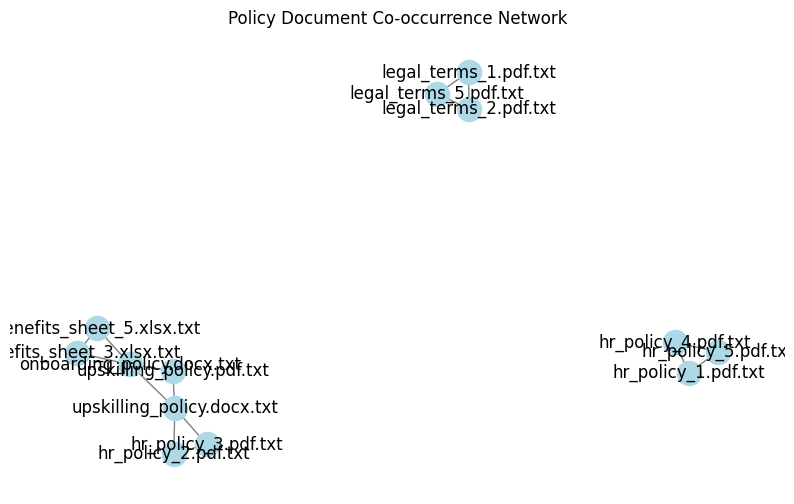

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for row in co_occur_df.itertuples():
    G.add_edge(row.doc1, row.doc2, weight=row.count)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Policy Document Co-occurrence Network")
plt.axis('off')
plt.show()


In [38]:
import re

career_terms = {
    "promotion": r"\b(promotion|promote[sd]?)\b",
    "raise": r"\b(raise|increment|salary hike|pay increase)\b",
    "training": r"\b(training|learning|upskilling|L&D|development program)\b",
    "performance": r"\b(performance review|appraisal|evaluation)\b"
}


In [40]:
tagged_chunks = []

# Reload the correct DataFrame with the 'text' column
df = pd.read_csv("chunk_metadata.csv")

for i, row in df.iterrows():
    tags = []
    for label, pattern in career_terms.items():
        if re.search(pattern, row['text'], flags=re.IGNORECASE):
            tags.append(label)
    tagged_chunks.append(", ".join(tags) if tags else "none")

df['career_tags'] = tagged_chunks
df.to_csv("tagged_chunks.csv", index=False)
print("✅ Career-impact tagging complete.")

✅ Career-impact tagging complete.


In [41]:
df['career_tags'].value_counts()


,count
career_tags,
none,22
training,3
performance,3


---

### Option 2: Render Flow Using `graphviz` in Colab

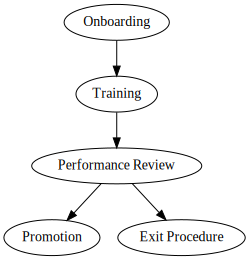

In [43]:
!pip install graphviz
from graphviz import Digraph

dot = Digraph()

dot.edge("Onboarding", "Training")
dot.edge("Training", "Performance Review")
dot.edge("Performance Review", "Promotion")
dot.edge("Performance Review", "Exit Procedure")

dot.render("compliance_flowchart", format='png', cleanup=False)
dot

In [44]:
import os
from collections import Counter

uploaded_files = os.listdir("data/uploads")
file_types = [f.split(".")[-1] for f in uploaded_files]

print("📂 Total uploaded files:", len(uploaded_files))
print("📄 File types count:", Counter(file_types))


📂 Total uploaded files: 28
📄 File types count: Counter({'pdf': 14, 'docx': 9, 'xlsx': 5})


In [45]:
import pandas as pd

df_chunks = pd.read_csv("chunk_metadata.csv")
print("🧩 Total text chunks:", len(df_chunks))
print("🗃️ Chunks per document:")
print(df_chunks["filename"].value_counts().head())


🧩 Total text chunks: 28
🗃️ Chunks per document:
filename
benefits_sheet_3.xlsx.txt      1
hr_policy_5.pdf.txt            1
legal_terms_3.pdf.txt          1
admin_guidelines_4.docx.txt    1
admin_guidelines_2.docx.txt    1
Name: count, dtype: int64


In [46]:
df_qa = pd.read_csv("qa_log.csv")
all_sources = ",".join(df_qa["sources"].tolist()).split(",")
print("📊 Top retrieved documents:")
print(pd.Series(all_sources).value_counts().head())


📊 Top retrieved documents:
 upskilling_policy.docx.txt    2
onboarding_policy.docx.txt     2
legal_terms_2.pdf.txt          1
 legal_terms_5.pdf.txt         1
 legal_terms_1.pdf.txt         1
Name: count, dtype: int64


In [47]:
df_tagged = pd.read_csv("tagged_chunks.csv")
print("🏷️ Career tag distribution:")
print(df_tagged["career_tags"].value_counts())


🏷️ Career tag distribution:
career_tags
none           22
training        3
performance     3
Name: count, dtype: int64


In [48]:
from fpdf import FPDF
import cv2
import numpy as np

os.makedirs("data/uploads", exist_ok=True)

# 1. Create empty PDF (no content)
pdf = FPDF()
pdf.add_page()
pdf.output("data/uploads/empty_file.pdf")

# 2. Create scanned-style image PDF
# Create a blank image with some text (simulating a scan)
img = np.ones((800, 1000, 3), dtype=np.uint8) * 255
cv2.putText(img, "This is a scanned document", (100, 400),
            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 3, cv2.LINE_AA)

# Save as image then convert to PDF
cv2.imwrite("scanned_page.jpg", img)
from PIL import Image
Image.open("scanned_page.jpg").convert("RGB").save("data/uploads/scanned_policy.pdf")

print("✅ Added empty_file.pdf and scanned_policy.pdf to /data/uploads/")


ModuleNotFoundError: No module named 'fpdf'

In [49]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=b16d77bfbc7880b426032769b7d51cc1c2499f99dbe237634d16f4a982cbbbac
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [50]:
from fpdf import FPDF
import cv2
import numpy as np
from PIL import Image
import os

os.makedirs("data/uploads", exist_ok=True)

# 1. Create empty PDF (no content)
pdf = FPDF()
pdf.add_page()
pdf.output("data/uploads/empty_file.pdf")

# 2. Create scanned-style image PDF
# Create a blank image with some text (simulating a scan)
img = np.ones((800, 1000, 3), dtype=np.uint8) * 255
cv2.putText(img, "This is a scanned document", (100, 400),
            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 3, cv2.LINE_AA)

# Save as image then convert to PDF
cv2.imwrite("scanned_page.jpg", img)

Image.open("scanned_page.jpg").convert("RGB").save("data/uploads/scanned_policy.pdf")

print("✅ Added empty_file.pdf and scanned_policy.pdf to /data/uploads/")

✅ Added empty_file.pdf and scanned_policy.pdf to /data/uploads/


In [51]:
import os
import re
import pandas as pd
from PyPDF2 import PdfReader
from docx import Document
import openpyxl

UPLOAD_DIR = "data/uploads"
TEXT_DIR = "data/text"
os.makedirs(TEXT_DIR, exist_ok=True)

failures = []

def clean_text(raw_text):
    text = raw_text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def parse_pdf(file_path):
    reader = PdfReader(file_path)
    text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    return text

def parse_docx(file_path):
    doc = Document(file_path)
    return "\n".join([p.text for p in doc.paragraphs if p.text.strip()])

def parse_xlsx(file_path):
    wb = openpyxl.load_workbook(file_path)
    text = []
    for sheet in wb.worksheets:
        for row in sheet.iter_rows(values_only=True):
            row_text = " | ".join([str(cell).strip() if cell else "" for cell in row])
            if row_text.strip():
                text.append(row_text)
    return "\n".join(text)

# Process all uploaded files
for filename in os.listdir(UPLOAD_DIR):
    path = os.path.join(UPLOAD_DIR, filename)
    output_path = os.path.join(TEXT_DIR, f"{filename}.txt")

    try:
        if filename.endswith(".pdf"):
            text = parse_pdf(path)
        elif filename.endswith(".docx"):
            text = parse_docx(path)
        elif filename.endswith(".xlsx"):
            text = parse_xlsx(path)
        else:
            raise ValueError("Unsupported file type")

        cleaned = clean_text(text)
        if not cleaned.strip():
            raise ValueError("No text extracted (possibly image-based or empty)")

        with open(output_path, "w", encoding="utf-8") as f:
            f.write(cleaned)

        print(f"✅ Parsed: {filename}")

    except Exception as e:
        print(f"[ERROR] File: {filename} | Reason: {e}")
        failures.append({"file": filename, "reason": str(e)})

# Save failure log if any
if failures:
    pd.DataFrame(failures).to_csv("parse_failures.csv", index=False)
    print("❗ Failures logged in parse_failures.csv")
else:
    print("✅ All files parsed successfully!")


✅ Parsed: legal_terms_2.pdf
✅ Parsed: it_guidelines.pdf
✅ Parsed: upskilling_policy.docx
✅ Parsed: benefits_sheet_1.xlsx
✅ Parsed: legal_terms_5.pdf
✅ Parsed: admin_guidelines_2.docx
✅ Parsed: termination_procedure.docx
[ERROR] File: empty_file.pdf | Reason: No text extracted (possibly image-based or empty)
✅ Parsed: admin_guidelines_5.docx
✅ Parsed: hr_policy_5.pdf
✅ Parsed: benefits_sheet_4.xlsx
✅ Parsed: legal_terms_3.pdf
✅ Parsed: admin_guidelines_3.docx
✅ Parsed: onboarding_policy.docx
✅ Parsed: benefits_sheet_3.xlsx
[ERROR] File: scanned_policy.pdf | Reason: No text extracted (possibly image-based or empty)
✅ Parsed: benefits_sheet_2.xlsx
✅ Parsed: upskilling_policy.pdf
✅ Parsed: it_team_guidelines.pdf
✅ Parsed: hr_policy_1.pdf
✅ Parsed: benefits_sheet_5.xlsx
✅ Parsed: legal_terms_4.pdf
✅ Parsed: admin_guidelines_1.docx
✅ Parsed: termination_policy.pdf
✅ Parsed: onboarding_process.docx
✅ Parsed: legal_terms_1.pdf
✅ Parsed: admin_guidelines_4.docx
✅ Parsed: hr_policy_2.pdf
✅ Parse

In [52]:
!pip freeze > requirements.txt
